# Palkkajakaumien tarkastelua

Verrataan elinkaarimallin palkkajakaumia eri ryhmille havaittuihin

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle
import gym

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

pop_size=1_000

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 71
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False



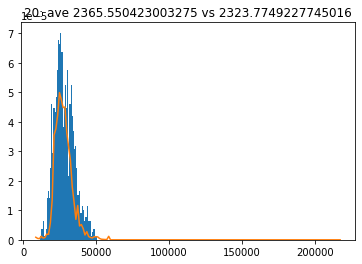

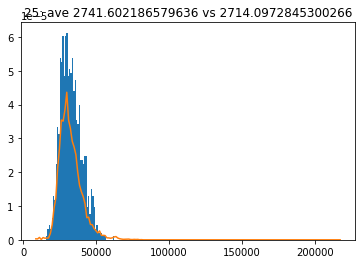

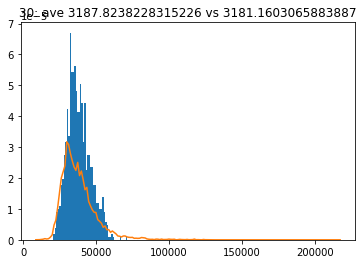

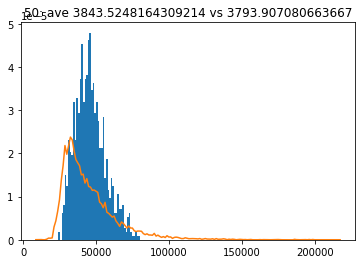

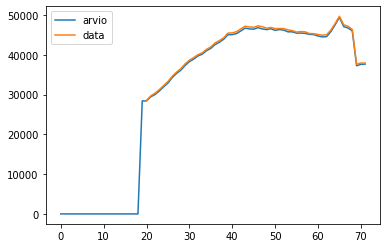

In [2]:
ben=gym.make('unemployment-v2',kwargs={})

n=1000
m=0

palkat_ika_miehet=12.5*np.array([2339.01,2489.09,2571.40,2632.58,2718.03,2774.21,2884.89,2987.55,3072.40,3198.48,3283.81,3336.51,3437.30,3483.45,3576.67,3623.00,3731.27,3809.58,3853.66,3995.90,4006.16,4028.60,4104.72,4181.51,4134.13,4157.54,4217.15,4165.21,4141.23,4172.14,4121.26,4127.43,4134.00,4093.10,4065.53,4063.17,4085.31,4071.25,4026.50,4031.17,4047.32,4026.96,4028.39,4163.14,4266.42,4488.40,4201.40,4252.15,4443.96,3316.92,3536.03,3536.03])
palkat_ika_naiset=12.5*np.array([2223.96,2257.10,2284.57,2365.57,2443.64,2548.35,2648.06,2712.89,2768.83,2831.99,2896.76,2946.37,2963.84,2993.79,3040.83,3090.43,3142.91,3159.91,3226.95,3272.29,3270.97,3297.32,3333.42,3362.99,3381.84,3342.78,3345.25,3360.21,3324.67,3322.28,3326.72,3326.06,3314.82,3303.73,3302.65,3246.03,3244.65,3248.04,3223.94,3211.96,3167.00,3156.29,3175.23,3228.67,3388.39,3457.17,3400.23,3293.52,2967.68,2702.05,2528.84,2528.84])
g_r=[0.77,1.0,1.23]
data_range=np.arange(20,72)

sal20=np.zeros((n,1))
sal25=np.zeros((n,1))
sal30=np.zeros((n,1))
sal50=np.zeros((n,1))
sal=np.zeros((n,72))

p=np.arange(700,17500,100)*12.5
palkka20=np.array([10.3,5.6,4.5,14.2,7.1,9.1,22.8,22.1,68.9,160.3,421.6,445.9,501.5,592.2,564.5,531.9,534.4,431.2,373.8,320.3,214.3,151.4,82.3,138.0,55.6,61.5,45.2,19.4,32.9,13.1,9.6,7.4,12.3,12.5,11.5,5.3,2.4,1.6,1.2,1.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka25=np.array([12.4,11.3,30.2,4.3,28.5,20.3,22.5,23.7,83.3,193.0,407.9,535.0,926.5,1177.1,1540.9,1526.4,1670.2,1898.3,1538.8,1431.5,1267.9,1194.8,1096.3,872.6,701.3,619.0,557.2,465.8,284.3,291.4,197.1,194.4,145.0,116.7,88.7,114.0,56.9,57.3,55.0,25.2,24.4,20.1,25.2,37.3,41.4,22.6,14.1,9.4,6.3,7.5,8.1,9.0,4.0,3.4,5.4,4.1,5.2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka30=np.array([1.0,2.0,3.0,8.5,12.1,22.9,15.8,21.8,52.3,98.2,295.3,392.8,646.7,951.4,1240.5,1364.5,1486.1,1965.2,1908.9,1729.5,1584.8,1460.6,1391.6,1551.9,1287.6,1379.0,1205.6,1003.6,1051.6,769.9,680.5,601.2,552.0,548.3,404.5,371.0,332.7,250.0,278.2,202.2,204.4,149.8,176.7,149.0,119.6,76.8,71.4,56.3,75.9,76.8,58.2,50.2,46.8,48.9,30.1,32.2,28.8,31.1,45.5,41.2,36.5,18.1,11.6,8.5,10.2,4.3,13.5,12.3,4.9,13.9,5.4,5.9,7.4,14.1,9.6,8.4,11.5,0.0,3.3,9.0,5.2,5.0,3.1,7.4,2.0,4.0,4.1,14.0,2.0,3.0,1.0,0.0,6.2,2.0,1.2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka50=np.array([2.0,3.1,2.4,3.9,1.0,1.0,11.4,30.1,29.3,34.3,231.9,341.9,514.4,724.0,1076.8,1345.2,1703.0,1545.8,1704.0,1856.1,1805.4,1608.1,1450.0,1391.4,1338.5,1173.2,1186.3,1024.8,1105.6,963.0,953.0,893.7,899.8,879.5,857.0,681.5,650.5,579.2,676.8,498.0,477.5,444.3,409.1,429.0,340.5,297.2,243.1,322.5,297.5,254.1,213.1,249.3,212.1,212.8,164.4,149.3,158.6,157.4,154.1,112.7,93.4,108.4,87.3,86.7,82.0,115.9,66.9,84.2,61.4,43.7,58.1,40.9,73.9,50.0,51.6,25.7,43.2,48.2,43.0,32.6,21.6,22.4,36.3,28.3,19.4,21.1,21.9,21.5,19.2,15.8,22.6,9.3,14.0,22.4,14.0,13.0,11.9,18.7,7.3,21.6,9.5,11.2,12.0,18.2,12.9,2.2,10.7,6.1,11.7,7.6,1.0,4.7,8.5,6.4,3.3,4.6,1.2,3.7,5.8,1.0,1.0,1.0,1.0,3.2,1.2,3.1,2.2,2.3,2.1,1.1,2.0,2.1,2.2,4.6,2.2,1.0,1.0,1.0,0.0,3.0,1.2,0.0,8.2,3.0,1.0,1.0,2.1,1.2,3.2,1.0,5.2,1.1,5.2,1.0,1.2,2.3,1.0,3.1,1.0,1.0,1.1,1.6,1.1,1.1,1.0,1.0,1.0,1.0])

for k in range(n):
    g=rd.choices(np.array([0,1,2],dtype=int),weights=[0.3,0.5,0.2])[0]
    gender=rd.choices(np.array([0,1],dtype=int),weights=[0.5,0.5])[0]
    group=int(g+gender*3)
    ben.compute_salary_TK(group=group)
    sal20[m]=ben.salary[20]
    sal25[m]=ben.salary[25]
    sal30[m]=ben.salary[30]
    sal50[m]=ben.salary[50]
    sal[m,:]=ben.salary
    m=m+1

def kuva(sal,ika,p,palkka):
    plt.hist(sal,bins=50,density=True)
    ave=np.mean(sal)/12
    palave=np.sum(palkka*p)/12/np.sum(palkka)
    plt.title('{}: ave {} vs {}'.format(ika,ave,palave))
    plt.plot(p,palkka/sum(palkka)/2000)
    plt.show()


kuva(sal20,20,p,palkka20)
kuva(sal25,25,p,palkka25)
kuva(sal30,30,p,palkka30)
kuva(sal50,50,p,palkka50)

data_range=np.arange(20,72)
plt.plot(np.mean(sal,axis=0),label='arvio')
plt.plot(data_range,0.5*palkat_ika_miehet+0.5*palkat_ika_naiset,label='data')

plt.legend()
plt.show()


plotdebug False
No mortality included
True
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 71
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Group 0:


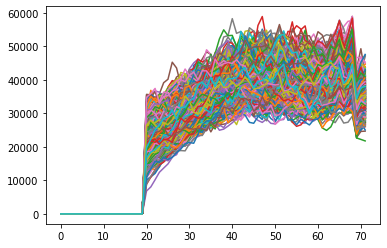

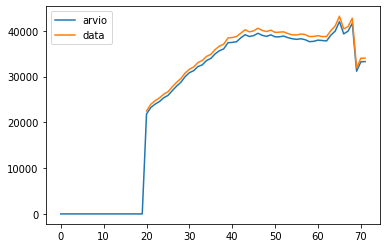

Group 1:


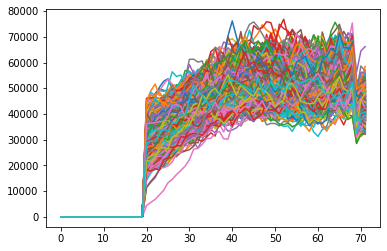

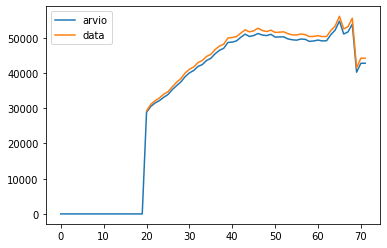

Group 2:


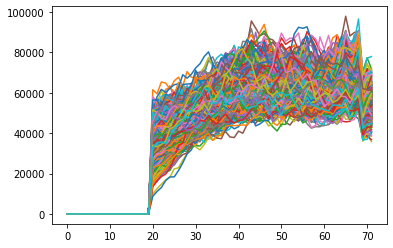

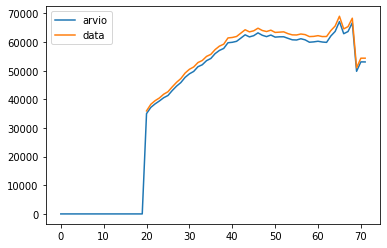

Group 3:


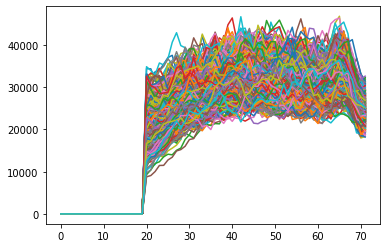

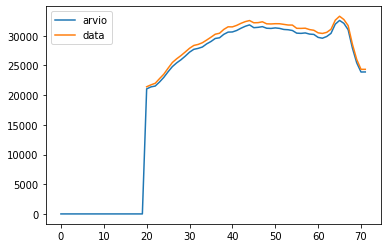

Group 4:


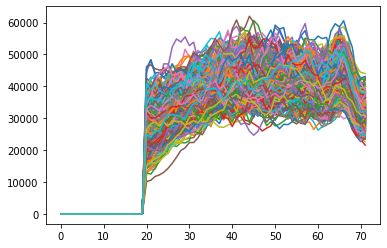

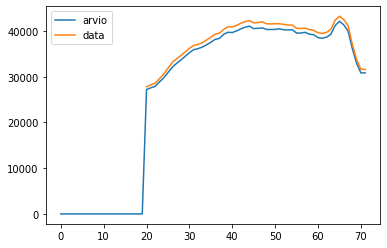

Group 5:


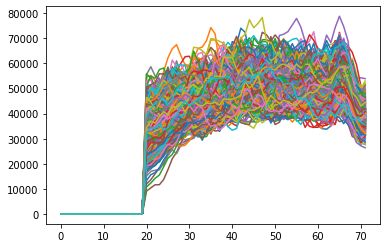

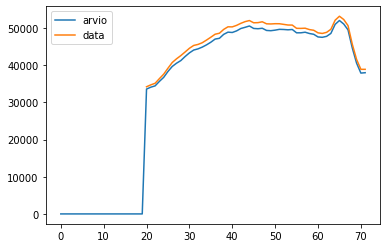

In [3]:
ben=gym.make('unemployment-v1',kwargs={})

n=1000

for g in range(6):
    print('Group {}:'.format(g))
    sal=np.zeros((n,72))
    for k in range(20,n):
        ben.compute_salary_TK(group=g)
        sal[k,:]=ben.salary
        plt.plot(ben.salary)

    plt.show()
    
    plt.plot(np.mean(sal,axis=0),label='arvio')
    if g<3:
        plt.plot(data_range,palkat_ika_miehet*g_r[g],label='data')
    else:
        plt.plot(data_range,palkat_ika_naiset*g_r[g-3],label='data')
        
    plt.legend()
    plt.show()

In [4]:
import random

random.choices([0,1,2],weights=[0.3,0.3,0.4])


[2]

In [5]:
# test benefits

In [6]:
import fin_benefits
import numpy as np

#opiskelija
ben=fin_benefits.Benefits()
p,selite=fin_benefits.perheparametrit(perhetyyppi=50,tulosta=False)
tulot,q=ben.laske_tulot(p)
tulot=tulot-440
print(np.exp(4))

54.598150033144236


In [7]:
ben.check_p(p)

{'tyoton': 1,
 'ika': 30,
 'saa_ansiopaivarahaa': 1,
 't': 0,
 'vakiintunutpalkka': 1500,
 'perustulo': 0,
 'asumismenot_toimeentulo': 440,
 'asumismenot_asumistuki': 411,
 'lapsia': 0,
 'paivahoidossa': 0,
 'aikuisia': 1,
 'veromalli': 0,
 'kuntaryhma': 2,
 'lapsia_kotihoidontuella': 0,
 'alle3v': 0,
 'ansiopvrahan_suojaosa': 1,
 'ansiopvraha_lapsikorotus': 1,
 'puoliso_tulot': 0,
 'puoliso_tyoton': 0,
 'puoliso_vakiintunutpalkka': 0,
 'puoliso_saa_ansiopaivarahaa': 0,
 'puoliso_tyottomyyden_kesto': 100,
 'tyottomyyden_kesto': 10,
 'elakkeella': 0,
 'tyoelake': 0,
 'opiskelija': 0,
 'aitiysvapaalla': 0,
 'isyysvapaalla': 0,
 'kotihoidontuella': 0,
 'asumismenot_yhdistetty': 440,
 'puoliso_elakkeella': 0,
 'puoliso_opiskelija': 0,
 'puoliso_tyoelake': 0,
 'puoliso_aitiysvapaalla': 0,
 'puoliso_isyysvapaalla': 0,
 'puoliso_sairauspaivarahalla': 0,
 'puoliso_kotihoidontuella': 0,
 'toimeentulotuki_vahennys': 0,
 'sairauspaivarahalla': 0,
 'disabled': 0}

In [8]:
ben=gym.make('unemployment-v0',kwargs={})

n=1000
m=0

data_range=np.arange(20,72)

sal20=np.zeros((n,1))
sal25=np.zeros((n,1))
sal30=np.zeros((n,1))
sal50=np.zeros((n,1))
sal=np.zeros((n,76))

p=np.arange(700,17500,100)*12.5
palkka20=np.array([10.3,5.6,4.5,14.2,7.1,9.1,22.8,22.1,68.9,160.3,421.6,445.9,501.5,592.2,564.5,531.9,534.4,431.2,373.8,320.3,214.3,151.4,82.3,138.0,55.6,61.5,45.2,19.4,32.9,13.1,9.6,7.4,12.3,12.5,11.5,5.3,2.4,1.6,1.2,1.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka25=np.array([12.4,11.3,30.2,4.3,28.5,20.3,22.5,23.7,83.3,193.0,407.9,535.0,926.5,1177.1,1540.9,1526.4,1670.2,1898.3,1538.8,1431.5,1267.9,1194.8,1096.3,872.6,701.3,619.0,557.2,465.8,284.3,291.4,197.1,194.4,145.0,116.7,88.7,114.0,56.9,57.3,55.0,25.2,24.4,20.1,25.2,37.3,41.4,22.6,14.1,9.4,6.3,7.5,8.1,9.0,4.0,3.4,5.4,4.1,5.2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka30=np.array([1.0,2.0,3.0,8.5,12.1,22.9,15.8,21.8,52.3,98.2,295.3,392.8,646.7,951.4,1240.5,1364.5,1486.1,1965.2,1908.9,1729.5,1584.8,1460.6,1391.6,1551.9,1287.6,1379.0,1205.6,1003.6,1051.6,769.9,680.5,601.2,552.0,548.3,404.5,371.0,332.7,250.0,278.2,202.2,204.4,149.8,176.7,149.0,119.6,76.8,71.4,56.3,75.9,76.8,58.2,50.2,46.8,48.9,30.1,32.2,28.8,31.1,45.5,41.2,36.5,18.1,11.6,8.5,10.2,4.3,13.5,12.3,4.9,13.9,5.4,5.9,7.4,14.1,9.6,8.4,11.5,0.0,3.3,9.0,5.2,5.0,3.1,7.4,2.0,4.0,4.1,14.0,2.0,3.0,1.0,0.0,6.2,2.0,1.2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka50=np.array([2.0,3.1,2.4,3.9,1.0,1.0,11.4,30.1,29.3,34.3,231.9,341.9,514.4,724.0,1076.8,1345.2,1703.0,1545.8,1704.0,1856.1,1805.4,1608.1,1450.0,1391.4,1338.5,1173.2,1186.3,1024.8,1105.6,963.0,953.0,893.7,899.8,879.5,857.0,681.5,650.5,579.2,676.8,498.0,477.5,444.3,409.1,429.0,340.5,297.2,243.1,322.5,297.5,254.1,213.1,249.3,212.1,212.8,164.4,149.3,158.6,157.4,154.1,112.7,93.4,108.4,87.3,86.7,82.0,115.9,66.9,84.2,61.4,43.7,58.1,40.9,73.9,50.0,51.6,25.7,43.2,48.2,43.0,32.6,21.6,22.4,36.3,28.3,19.4,21.1,21.9,21.5,19.2,15.8,22.6,9.3,14.0,22.4,14.0,13.0,11.9,18.7,7.3,21.6,9.5,11.2,12.0,18.2,12.9,2.2,10.7,6.1,11.7,7.6,1.0,4.7,8.5,6.4,3.3,4.6,1.2,3.7,5.8,1.0,1.0,1.0,1.0,3.2,1.2,3.1,2.2,2.3,2.1,1.1,2.0,2.1,2.2,4.6,2.2,1.0,1.0,1.0,0.0,3.0,1.2,0.0,8.2,3.0,1.0,1.0,2.1,1.2,3.2,1.0,5.2,1.1,5.2,1.0,1.2,2.3,1.0,3.1,1.0,1.0,1.1,1.6,1.1,1.1,1.0,1.0,1.0,1.0])

for k in range(n):
    ben.compute_salary()
    sal20[m]=ben.salary[20]
    sal25[m]=ben.salary[25]
    sal30[m]=ben.salary[30]
    sal50[m]=ben.salary[50]
    sal[m,:]=ben.salary
    m=m+1

def kuva(sal,ika,p,palkka):
    plt.hist(sal,bins=50,density=True)
    ave=np.mean(sal)/12
    palave=np.sum(palkka*p)/12/np.sum(palkka)
    plt.title('{}: ave {} vs {}'.format(ika,ave,palave))
    plt.plot(p,palkka/sum(palkka)/2000)
    plt.show()


kuva(sal20,20,p,palkka20)
kuva(sal25,25,p,palkka25)
kuva(sal30,30,p,palkka30)
kuva(sal50,50,p,palkka50)

data_range=np.arange(20,72)
plt.plot(np.mean(sal,axis=0),label='arvio')
plt.plot(data_range,ben.palkat_ika_miehet,label='data')

plt.legend()
plt.show()



Train  False
plotdebug False
minimal model
Parameters of lifecycle:
timestep 1.0
gamma 0.92 (0.92 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70 mortality False
ansiopvraha_kesto 1.0
reset_exploration_go True reset_exploration_ratio 0.4 plotdebug False



ValueError: could not broadcast input array from shape (71) into shape (76)